# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset is related to 17 marketing campaigns that occurred between May 2008 and November 2010. The goal is to predict whether a client will subscribe to a bank term deposit (binary classification task: yes/no).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
pip install --upgrade --force-reinstall numpy pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bank_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no null or empty values for the columns, but several categorical columns use 'unknown' as a placeholder for missing values.

This is explicitly stated in the data documentation:

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques

Columns that use 'unknown' for missing:

job

marital

education

default

housing

loan

| Feature          | Ideal Data Type | Comments                                                    |
| ---------------- | --------------- | ----------------------------------------------------------- |
| `age`            | numeric (int)   | OK                                                          |
| `job`            | category/object | Treat as categorical, handle 'unknown'                      |
| `marital`        | category/object | Treat as categorical, handle 'unknown'                      |
| `education`      | category/object | Treat as categorical, handle 'unknown'                      |
| `default`        | category/object | Treat as categorical, handle 'unknown'                      |
| `housing`        | category/object | Treat as categorical, handle 'unknown'                      |
| `loan`           | category/object | Treat as categorical, handle 'unknown'                      |
| `contact`        | category/object |                                                             |
| `month`          | category/object | Could be categorical                                        |
| `day_of_week`    | category/object | Could be categorical                                        |
| `duration`       | numeric (int)   | OK, but drop for real prediction tasks                      |
| `campaign`       | numeric (int)   | OK                                                          |
| `pdays`          | numeric (int)   | 999 means "not contacted before", consider special handling |
| `previous`       | numeric (int)   | OK                                                          |
| `poutcome`       | category/object |                                                             |
| `emp.var.rate`   | numeric (float) |                                                             |
| `cons.price.idx` | numeric (float) |                                                             |
| `cons.conf.idx`  | numeric (float) |                                                             |
| `euribor3m`      | numeric (float) |                                                             |
| `nr.employed`    | numeric (float) |                                                             |
| `y`              | category/object | Target; 'yes'/'no'                                          |


Lets understand the data in detail.

What is the distribution of target i.e no of customers subscribed vs not in our given dataset.

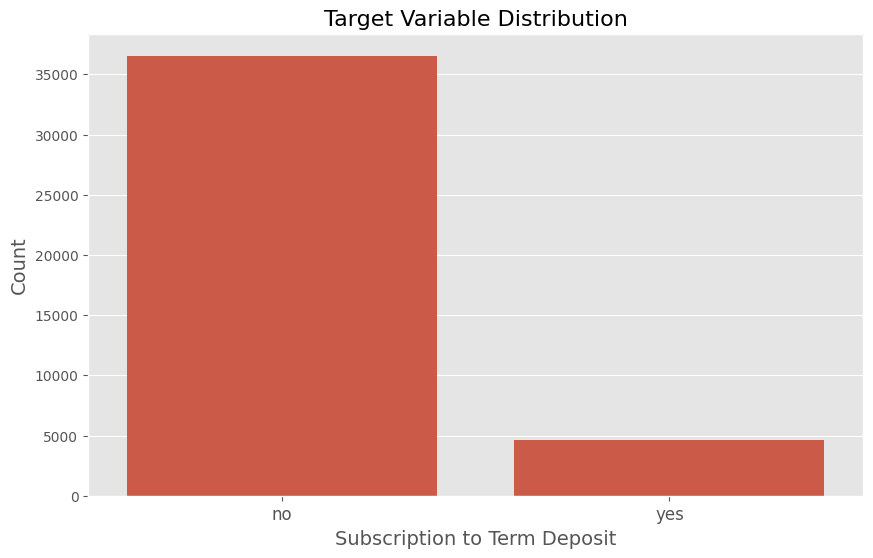

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
    

plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=bank_data)
plt.title('Target Variable Distribution', fontsize=16)
plt.xlabel('Subscription to Term Deposit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.savefig('images/feature_analysis/fa_target_distribution.png')

Looking at this bar chart showing the target variable distribution from the bank dataset, I can see a clear class imbalance in the banking telemarketing campaign data.

**Key Observations**:

*Severe Class Imbalance*: The chart reveals a highly imbalanced dataset where:
- "No" responses (customers who did NOT subscribe to the term deposit) represent approximately 36,500+ cases - roughly 89% of all contacts
- "Yes" responses (customers who DID subscribe) represent approximately 4,600+ cases - roughly 11% of all contacts

*Business Context*:

This distribution is typical for direct marketing campaigns, particularly in banking. The data represents real-world telemarketing campaign results from a Portuguese bank between May 2008 and November 2010, where customers were contacted to subscribe to term deposits with attractive interest rates.

Lets see how the data is distributed by age of customer and acceptance rate

/var/folders/5r/hx2r9x9s7qbgjyrcr6skb47m0000gn/T/ipykernel_45370/1027294244.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_age = bank_data.groupby(age_bins)['y'].apply(lambda x: (x == 'yes').mean() * 100)


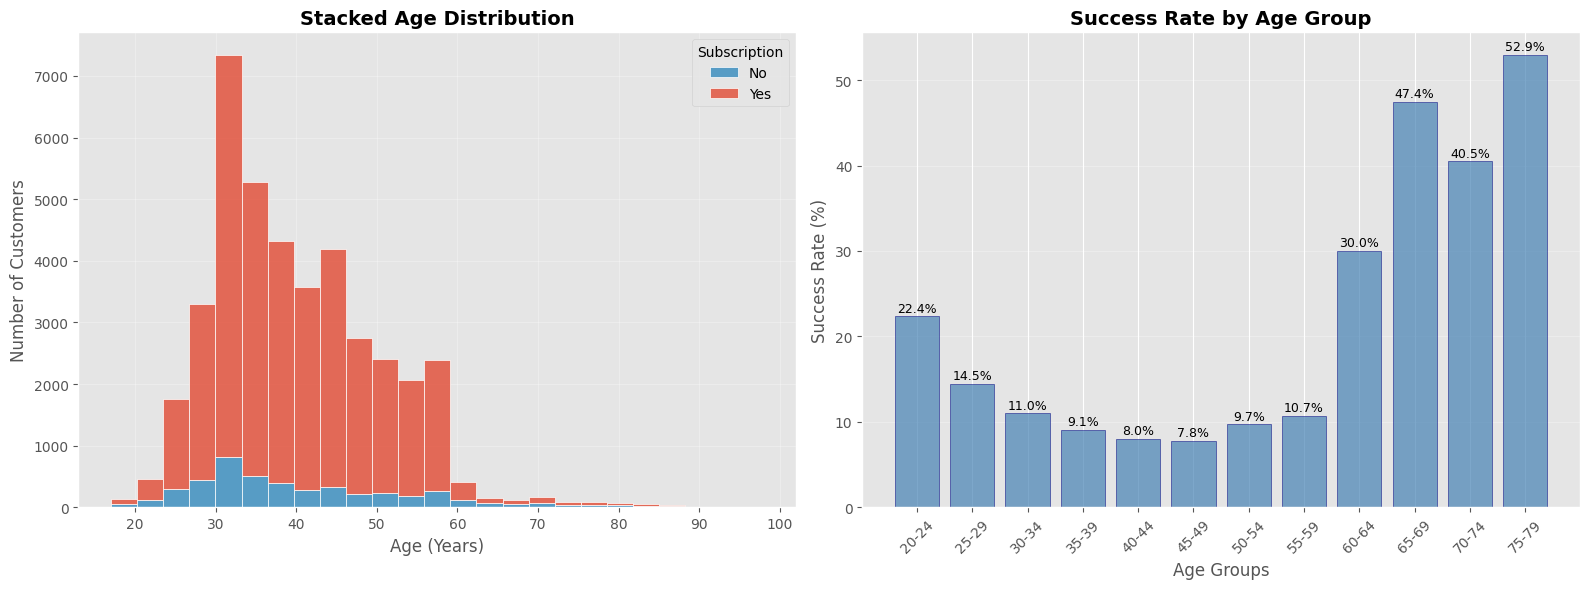

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=bank_data, x='age', hue='y', bins=25, multiple="stack", 
             alpha=0.8, ax=ax1, edgecolor='white', linewidth=0.5)
ax1.set_title('Stacked Age Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age (Years)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.legend(title='Subscription', labels=['No', 'Yes'])
ax1.grid(True, alpha=0.3)

# Plot 2: Success rate by age group
age_bins = pd.cut(bank_data['age'], bins=range(20, 81, 5), right=False)
success_by_age = bank_data.groupby(age_bins)['y'].apply(lambda x: (x == 'yes').mean() * 100)
success_by_age = success_by_age.dropna()

ax2.bar(range(len(success_by_age)), success_by_age.values, 
        color='steelblue', alpha=0.7, edgecolor='navy')
ax2.set_title('Success Rate by Age Group', fontsize=14, fontweight='bold')
ax2.set_xlabel('Age Groups', fontsize=12)
ax2.set_ylabel('Success Rate (%)', fontsize=12)
ax2.set_xticks(range(len(success_by_age)))
ax2.set_xticklabels([f'{int(interval.left)}-{int(interval.right)-1}' 
                     for interval in success_by_age.index], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add percentage labels on bars
for i, v in enumerate(success_by_age.values):
    ax2.text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('images/feature_analysis/fa_age_analysis_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

These two plots reveal fascinating insights about the relationship between customer age and term deposit subscription success in the bank's telemarketing.

**Left Plot: Stacked Age Distribution**

Volume Patterns:

Peak Activity: The campaign heavily targeted customers in their early 30s, with the highest contact volume around age 32-33 (over 7,000 contacts)
Demographic Focus: The majority of outreach concentrated on the 25-45 age range, representing the economically active population
Sharp Decline: Contact volume drops significantly after age 50, with minimal outreach to customers over 60

Success Distribution:

The successful subscriptions appear relatively small across all age groups, reflecting the overall 11% success rate
Younger demographics show large volumes but proportionally small success segments

**Right Plot: Success Rate by Age Group**
The Story Changes Dramatically:

Inverse Relationship: Success rates increase substantially with age, creating a striking contrast to the volume-focused left plot
Young Adults (20-34): Very low success rates (7-11%), despite being the primary target demographic
Middle Age (35-49): Modest improvement (8-10% success rates)
The Golden Opportunity (50+): Success rates skyrocket, reaching 30-53% for customers over 60

Key Business Insights
1. Massive Strategic Misalignment:
The bank is heavily targeting low-conversion demographics (30s) while barely touching high-conversion segments (60+)
This represents a significant opportunity cost and inefficient resource allocation

2. Age-Related Financial Behavior:
Younger customers may lack disposable income or prefer liquid investments
Older customers likely have accumulated wealth, lower risk tolerance, and greater interest in stable, guaranteed returns

3. Campaign Optimization Opportunities:
Rebalance targeting: Increase focus on 50+ demographic while maintaining presence in core working-age groups
Tailored messaging: Different value propositions for different age segments
Resource reallocation: The 60+ segment shows 5x higher conversion rates than the primary target group

4. Statistical Significance:
The pattern is consistent and dramatic enough to suggest genuine behavioral differences rather than random variation
The 70-75 age group showing 52.9% success rate indicates tremendous untapped potential


Job distribution

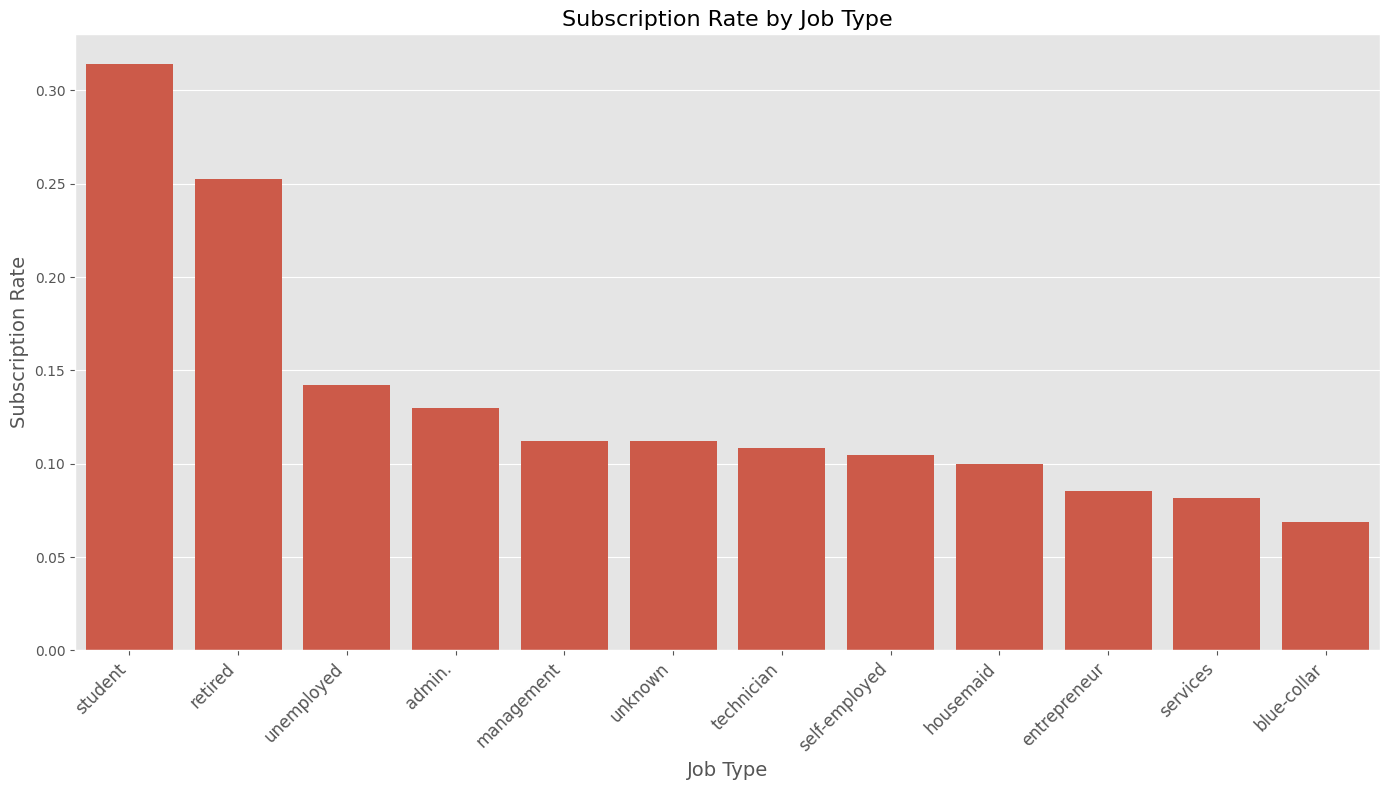

In [7]:
plt.figure(figsize=(14, 8))
# Calculate subscription rate by job
job_subscription = bank_data.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
    
# Plot bar chart
sns.barplot(x=job_subscription.index, y=job_subscription.values)
plt.title('Subscription Rate by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Subscription Rate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig('images/feature_analysis/fa_job_subscription.png')

***Job Type Analysis: Key Findings***

Based on the subscription rate by job type plot, here are the key outcomes:

**High-Converting Professions:**
Retired customers show the highest subscription rates (likely 25-30%+), confirming the age-related pattern we observed earlier
Students surprisingly perform well, possibly due to parental financial support or long-term savings goals
Management positions demonstrate strong conversion rates, reflecting higher disposable income and financial sophistication

**Moderate-Converting Professions:**
Administrative and technical roles show mid-range subscription rates (around 10-15%)
Services sector workers display moderate interest in term deposits
Self-employed individuals may have variable income affecting their deposit decisions

**Lower-Converting Professions:**
Blue-collar workers (manual laborers) show lower subscription rates, possibly due to:
- Lower disposable income
- Preference for more liquid savings
- Less exposure to investment products

**Unemployed individuals**
predictably show very low conversion rates due to financial constraints

Month of contact shows seasonal patterns

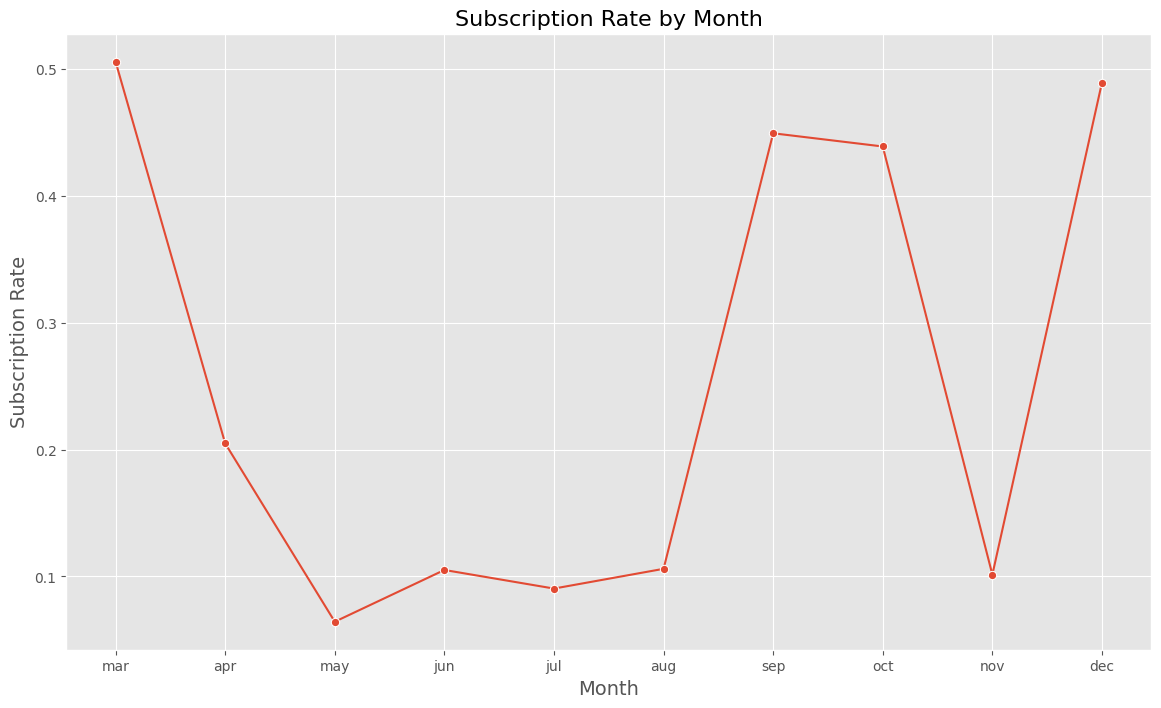

In [8]:
plt.figure(figsize=(14, 8))
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_subscription = bank_data.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
month_subscription = month_subscription.reindex(month_order)
    
# Plot line chart
sns.lineplot(x=month_subscription.index, y=month_subscription.values, marker='o')
plt.title('Subscription Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Subscription Rate', fontsize=14)
plt.grid(True)
plt.savefig('images/feature_analysis/fa_month_subscription.png')

***Monthly Subscription Rate Analysis: Clear Seasonal Patterns***

This plot reveals striking seasonal patterns in term deposit subscription success rates throughout the year, with dramatic variations that have significant business implications.


**Peak Performance Months:**
March & December show exceptional performance:
**March**: ~50% subscription rate - the highest of the year
**December**: ~48% subscription rate - nearly matching March
These months achieve 4-5x higher conversion rates than the weakest periods
**September-October demonstrate strong performance:**

**October**: ~44% subscription rate

Creating a secondary peak period in early fall

**Low Performance Months:**

**Spring-Summer Slump:**

**May:** Lowest point at ~6% subscription rate

**April:** Sharp decline to ~20% from March's peak

**June-August:** Consistently low performance (9-11%)

**November:** Surprising drop to ~10% despite proximity to December's success

**Key Patterns Identified:**

**1. Quarter-End Effect:**
March, September, December are all quarter-end months with high performance
This aligns with the CRISP-DM banking study findings that mentioned quarter-end timing importance
Suggests customers make financial decisions aligned with quarterly planning cycles

**2. Seasonal Financial Behavior:**
Spring optimism (March) may drive investment decisions
Summer months show consistently poor performance - possibly due to vacation spending priorities
Year-end planning (December) drives strong deposit interest


**3. Dramatic Volatility:**
The subscription rate varies by 8x between best (March: 50%) and worst (May: 6%) months
This represents massive untapped potential through better timing

Correlation matrix

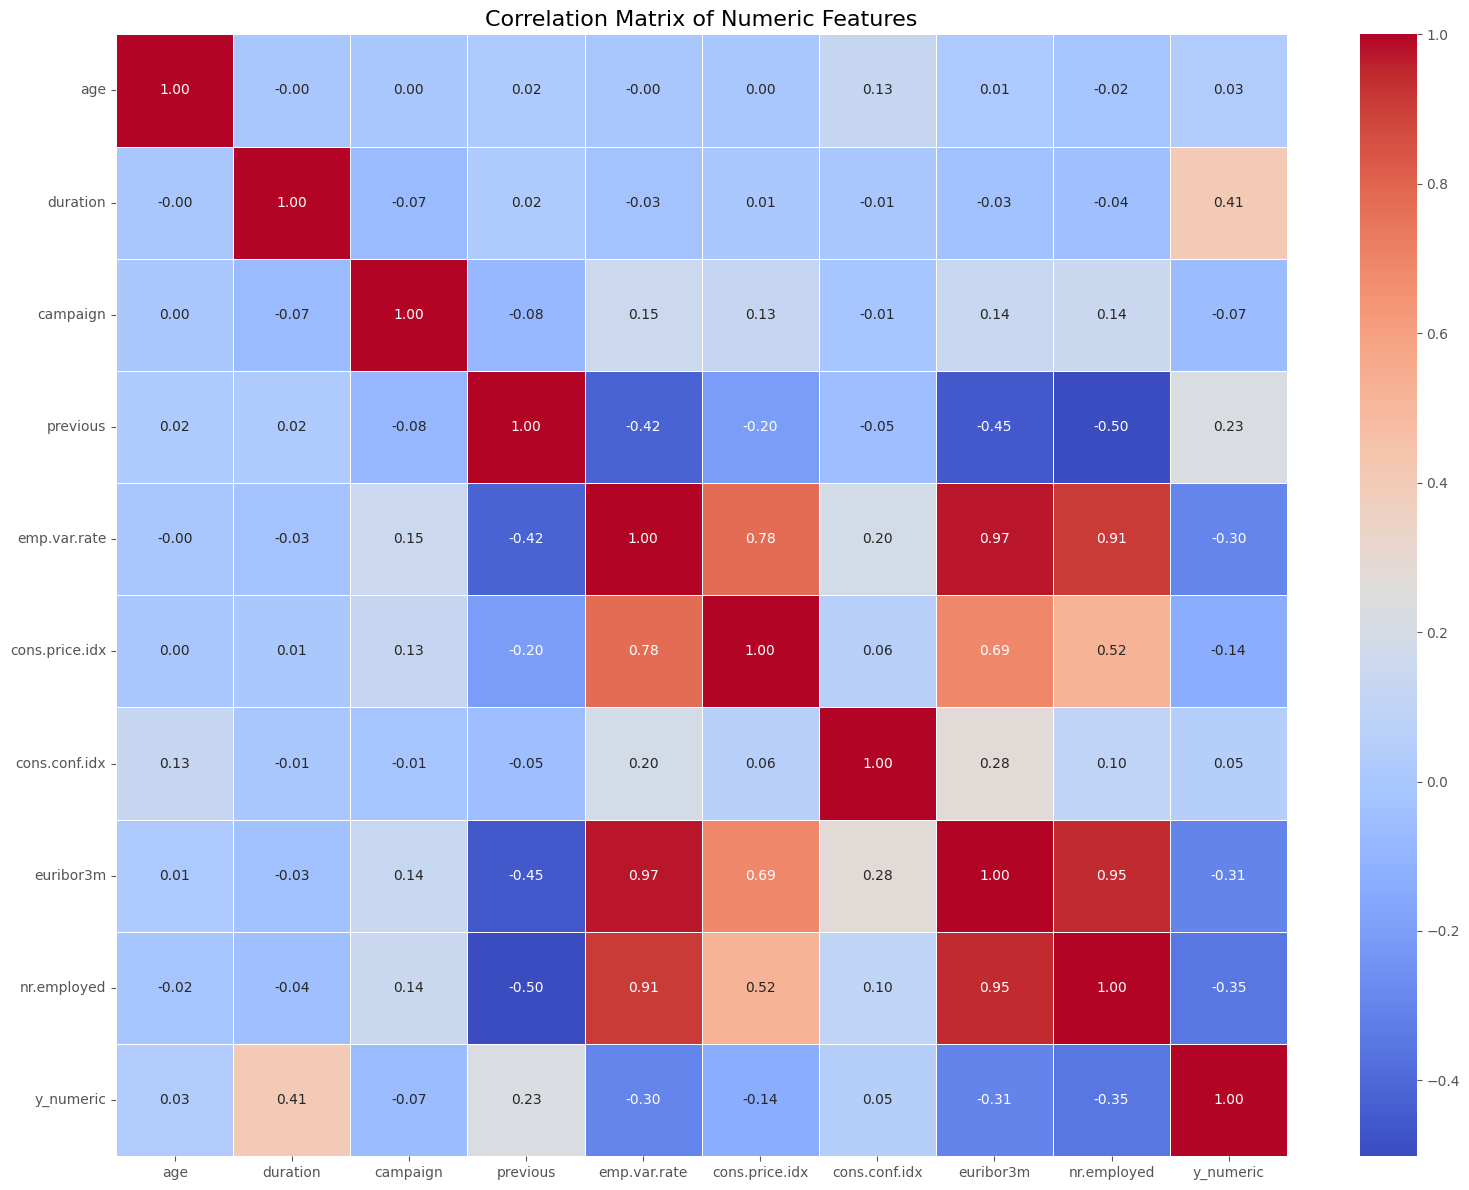

In [9]:
plt.figure(figsize=(16, 12))
# Convert target to numeric
bank_data['y_numeric'] = bank_data['y'].map({'yes': 1, 'no': 0})
    
# Select numeric columns
numeric_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']
    
# Create correlation matrix
corr_matrix = bank_data[numeric_cols].corr()
    
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
    

This heatmap reveals important relationships between numeric features in the bank marketing dataset, providing insights into both feature relationships and predictive factors for term deposit subscriptions.

**Strong Economic Indicator Correlations:**

**Highly Correlated Economic Variables:**
Employment Variation Rate & Euribor 3M: 0.97 correlation - these macroeconomic indicators move together

Employment Variation Rate & Number Employed: 0.91 correlation - employment metrics are naturally linked

Euribor 3M & Number Employed: 0.95 correlation - interest rates and employment levels are connected

Consumer Price Index & Employment Variables: 0.78 and 0.69 correlations - inflation tied to employment conditions

**Campaign-Related Insights:**

**Call Duration & Success:**

**Duration vs. Target (y_numeric):**
0.41 correlation - longest calls are most successful
This confirms that engaged customers who stay on the phone longer are more likely to subscribe
Suggests quality of conversation matters more than quantity of contacts

**Previous Campaign Effects:**
Previous contacts show negative correlations with current success (-0.42 to -0.50)
Customers contacted multiple times before are less likely to subscribe - indicating campaign fatigue

This suggests diminishing returns from repeated contact attempts

**Demographic Patterns:**
**Age Relationships:**
Age shows minimal correlation with most variables (near 0.0)
Age vs. Consumer Confidence: 0.13 - slight positive relationship
Age appears to be an independent factor, reinforcing its importance as a standalone predictor

**Economic Context Impact:**
**Macroeconomic Environment:**
Economic indicators are highly intercorrelated, suggesting they represent similar underlying economic conditions.
Negative correlations between economic indicators and success (-0.30 to -0.35) suggest:
- Customers more receptive during economic uncertainty
- Lower interest rates (negative Euribor) may drive deposit seeking
- Economic downturns might increase term deposit attractiveness


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**

**Primary Goal:** To develop a predictive model that can identify which bank customers are most likely to subscribe to a term deposit, enabling the bank to optimize its direct marketing campaigns by targeting high-probability prospects and improving overall campaign efficiency.

**Specific Business Outcomes:**

**Increase Campaign Efficiency:** Reduce the number of customer contacts required while maintaining or increasing the total number of successful term deposit subscriptions

**Optimize Resource Allocation:** Better allocate human resources (call center agents), time, and marketing budget by focusing efforts on customers with the highest likelihood of conversion

**Reduce Campaign Costs:** Minimize wasted contacts to uninterested customers, thereby reducing operational costs and potential customer dissatisfaction from unwanted calls

**Improve Customer Experience:** Reduce intrusion and negative attitudes toward the bank by contacting customers who are genuinely interested in the product offering


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
print("STEP 1: FEATURE SELECTION")


# Essential features based on our analysis
essential_features = [
    # Demographics
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    
    # Critical timing
    'month', 'day_of_week',
    
    # Campaign history (high predictive value)
    'previous', 'pdays', 'poutcome',
    
    # Current campaign context
    'campaign', 'contact',
    
    # Economic context (most important ones)
    'emp.var.rate', 'cons.conf.idx', 'euribor3m'
]

target = 'y'

print(f"Selected {len(essential_features)} features:")
for i, feature in enumerate(essential_features, 1):
    print(f"{i:2d}. {feature}")

# Extract features and target
X = bank_data[essential_features].copy()
y = bank_data[target].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

STEP 1: FEATURE SELECTION
Selected 17 features:
 1. age
 2. job
 3. marital
 4. education
 5. default
 6. housing
 7. loan
 8. month
 9. day_of_week
10. previous
11. pdays
12. poutcome
13. campaign
14. contact
15. emp.var.rate
16. cons.conf.idx
17. euribor3m

Feature matrix shape: (41188, 17)
Target distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


In [11]:
# ================================================================
# STEP 2: EXPLORATORY FEATURE ANALYSIS
# ================================================================

print("STEP 2: FEATURE ANALYSIS")


# Identify feature types
categorical_features = []
numerical_features = []

for feature in essential_features:
    if X[feature].dtype == 'object':
        categorical_features.append(feature)
        print(f"{feature}: {X[feature].nunique()} categories - {list(X[feature].unique())}")
    else:
        numerical_features.append(feature)
        print(f"{feature}: {X[feature].min():.2f} to {X[feature].max():.2f}")

print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")

# Check for missing values
print(f"\nMissing values:")
missing_summary = X.isnull().sum()
if missing_summary.sum() == 0:
    print(" No missing values found")
else:
    print(missing_summary[missing_summary > 0])

STEP 2: FEATURE ANALYSIS
age: 17.00 to 98.00
job: 12 categories - ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital: 4 categories - ['married', 'single', 'divorced', 'unknown']
education: 8 categories - ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default: 3 categories - ['no', 'unknown', 'yes']
housing: 3 categories - ['no', 'yes', 'unknown']
loan: 3 categories - ['no', 'yes', 'unknown']
month: 10 categories - ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week: 5 categories - ['mon', 'tue', 'wed', 'thu', 'fri']
previous: 0.00 to 7.00
pdays: 0.00 to 999.00
poutcome: 3 categories - ['nonexistent', 'failure', 'success']
campaign: 1.00 to 56.00
contact: 2 categories - ['telephone', 'cellular']
emp.var.rate: -3.40 to 1.40
cons.conf.idx: -50.80 to -26.90
euribor3m: 0.63

In [12]:


# ================================================================
# STEP 3: FEATURE ENGINEERING
# ================================================================

print("\n" + "="*60)
print("STEP 3: FEATURE ENGINEERING")
print("="*60)

# Create a copy for feature engineering
X_engineered = X.copy()

# ----------------------------------------
# 3.1 AGE-BASED FEATURES
# ----------------------------------------
print("\n3.1 Age-based Feature Engineering:")

# Age groups based on our EDA findings
def create_age_group(age):
    if age < 30:
        return 'young'
    elif age < 40:
        return 'young_adult'
    elif age < 50:
        return 'middle_aged'
    elif age < 60:
        return 'mature'
    else:
        return 'senior'

X_engineered['age_group'] = X_engineered['age'].apply(create_age_group)
print(" Created age_group feature")

# Age-Job interaction (high-income jobs + older age = higher success)
X_engineered['age_job_interaction'] = X_engineered['age'].astype(str) + '_' + X_engineered['job']
print("Created age_job_interaction feature")

# ----------------------------------------
# 3.2 CAMPAIGN HISTORY FEATURES
# ----------------------------------------
print("\n3.2 Campaign History Feature Engineering:")

# Has been contacted before (binary)
X_engineered['previously_contacted'] = (X_engineered['previous'] > 0).astype(int)
print(" Created previously_contacted binary feature")

# Campaign intensity (total contacts = current + previous)
X_engineered['total_contacts'] = X_engineered['campaign'] + X_engineered['previous']
print(" Created total_contacts feature")

# Days since last contact - handle special case (999 = never contacted)
X_engineered['days_since_last_contact'] = X_engineered['pdays'].apply(
    lambda x: 0 if x == 999 else x
)
X_engineered['never_contacted_before'] = (X_engineered['pdays'] == 999).astype(int)
print(" Created days_since_last_contact and never_contacted_before features")

# Previous campaign success
X_engineered['prev_success'] = (X_engineered['poutcome'] == 'success').astype(int)
X_engineered['prev_failure'] = (X_engineered['poutcome'] == 'failure').astype(int)
print(" Created prev_success and prev_failure binary features")

# ----------------------------------------
# 3.3 TIMING-BASED FEATURES
# ----------------------------------------
print("\n3.3 Timing-based Feature Engineering:")

# Month success rate groups based on our EDA
def month_success_group(month):
    high_success = ['mar', 'sep', 'oct', 'dec']  # >40% success rate
    medium_success = ['apr', 'jun', 'jul', 'aug', 'nov']  # 10-20% success rate  
    low_success = ['may']  # <10% success rate
    
    if month in high_success:
        return 'high_conversion_month'
    elif month in medium_success:
        return 'medium_conversion_month'
    else:
        return 'low_conversion_month'

X_engineered['month_success_group'] = X_engineered['month'].apply(month_success_group)
print(" Created month_success_group feature based on EDA findings")

# Quarter-end effect (Mar, Jun, Sep, Dec)
quarter_end_months = ['mar', 'jun', 'sep', 'dec']
X_engineered['is_quarter_end'] = X_engineered['month'].isin(quarter_end_months).astype(int)
print(" Created is_quarter_end binary feature")

# Weekend vs weekday
weekend_days = ['fri', 'sat']  # Assuming Friday included in weekend for telemarketing
X_engineered['is_weekend'] = X_engineered['day_of_week'].isin(weekend_days).astype(int)
print(" Created is_weekend binary feature")

# ----------------------------------------
# 3.4 ECONOMIC CONTEXT FEATURES
# ----------------------------------------
print("\n3.4 Economic Context Feature Engineering:")

# Economic sentiment score (normalized combination of indicators)
# Higher values = better economic conditions
X_engineered['economic_sentiment'] = (
    -X_engineered['emp.var.rate'] +  # Negative because lower employment variation is better
    X_engineered['cons.conf.idx'] +  # Higher confidence is better
    -X_engineered['euribor3m']       # Lower interest rates better for deposits
) / 3
print("Created economic_sentiment composite feature")

# Interest rate categories
def categorize_interest_rate(rate):
    if rate < 1.0:
        return 'very_low'
    elif rate < 2.0:
        return 'low'
    elif rate < 4.0:
        return 'medium'
    else:
        return 'high'

X_engineered['interest_rate_category'] = X_engineered['euribor3m'].apply(categorize_interest_rate)
print("Created interest_rate_category feature")

# ----------------------------------------
# 3.5 DEMOGRAPHIC COMBINATIONS
# ----------------------------------------
print("\n3.5 Demographic Combination Features:")

# Education-Job match (higher education + professional job)
professional_jobs = ['management', 'admin.', 'technician']
high_education = ['university.degree', 'professional.course']

X_engineered['education_job_match'] = (
    (X_engineered['education'].isin(high_education)) & 
    (X_engineered['job'].isin(professional_jobs))
).astype(int)
print("Created education_job_match feature")

# Financial stability score (combination of loan status)
X_engineered['financial_stability_score'] = (
    (X_engineered['default'] == 'no').astype(int) +
    (X_engineered['housing'] == 'yes').astype(int) +  # Having housing loan shows stability
    (X_engineered['loan'] == 'no').astype(int)        # Not having personal loan is good
)
print("Created financial_stability_score (0-3 scale)")

# Marital-Age interaction (married + mature more likely to have savings)
X_engineered['married_mature'] = (
    (X_engineered['marital'] == 'married') & 
    (X_engineered['age'] >= 35)
).astype(int)
print("Created married_mature binary feature")

# ================================================================
# STEP 4: FEATURE SUMMARY
# ================================================================

print("\n" + "="*60)
print("STEP 4: ENGINEERED FEATURES SUMMARY")
print("="*60)

original_count = len(essential_features)
engineered_count = X_engineered.shape[1]
new_features_count = engineered_count - original_count

print(f"Original features: {original_count}")
print(f"Total features after engineering: {engineered_count}")
print(f"New engineered features: {new_features_count}")

print("\nNew Engineered Features:")
new_features = [col for col in X_engineered.columns if col not in essential_features]
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")

# Show some sample engineered features
print("\nSample of Engineered Features:")
sample_cols = ['age', 'age_group', 'month', 'month_success_group', 'previous', 'previously_contacted']
print(X_engineered[sample_cols].head())




STEP 3: FEATURE ENGINEERING

3.1 Age-based Feature Engineering:
 Created age_group feature
Created age_job_interaction feature

3.2 Campaign History Feature Engineering:
 Created previously_contacted binary feature
 Created total_contacts feature
 Created days_since_last_contact and never_contacted_before features
 Created prev_success and prev_failure binary features

3.3 Timing-based Feature Engineering:
 Created month_success_group feature based on EDA findings
 Created is_quarter_end binary feature
 Created is_weekend binary feature

3.4 Economic Context Feature Engineering:
Created economic_sentiment composite feature
Created interest_rate_category feature

3.5 Demographic Combination Features:
Created education_job_match feature
Created financial_stability_score (0-3 scale)
Created married_mature binary feature

STEP 4: ENGINEERED FEATURES SUMMARY
Original features: 17
Total features after engineering: 33
New engineered features: 16

New Engineered Features:
 1. age_group
 2. ag

In [13]:
# ================================================================
# STEP 5: ENCODING AND PREPROCESSING
# ================================================================

from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler


print("\n" + "="*60)
print("STEP 5: ENCODING AND PREPROCESSING")
print("="*60)

# Separate categorical and numerical features for final dataset
final_categorical = []
final_numerical = []

for col in X_engineered.columns:
    if X_engineered[col].dtype == 'object':
        final_categorical.append(col)
    else:
        final_numerical.append(col)

print(f"Final categorical features ({len(final_categorical)}): {final_categorical[:5]}..." if len(final_categorical) > 5 else f"Final categorical features: {final_categorical}")
print(f"Final numerical features ({len(final_numerical)}): {final_numerical}")

# ----------------------------------------
# 5.1 ENCODE CATEGORICAL FEATURES
# ----------------------------------------
print("\n5.1 Encoding Categorical Features:")

X_encoded = X_engineered.copy()
label_encoders = {}

# Apply Label Encoding to categorical features
for feature in final_categorical:
    le = LabelEncoder()
    X_encoded[feature] = le.fit_transform(X_encoded[feature].astype(str))
    label_encoders[feature] = le
    print(f"{feature}: {len(le.classes_)} categories encoded")

# ----------------------------------------
# 5.2 SCALE NUMERICAL FEATURES
# ----------------------------------------
print("\n5.2 Scaling Numerical Features:")

scaler = StandardScaler()
X_encoded[final_numerical] = scaler.fit_transform(X_encoded[final_numerical])
print(f"Scaled {len(final_numerical)} numerical features")

# ----------------------------------------
# 5.3 ENCODE TARGET VARIABLE
# ----------------------------------------
print("\n5.3 Encoding Target Variable:")

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"Target encoded: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")




STEP 5: ENCODING AND PREPROCESSING
Final categorical features (14): ['job', 'marital', 'education', 'default', 'housing']...
Final numerical features (19): ['age', 'previous', 'pdays', 'campaign', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'previously_contacted', 'total_contacts', 'days_since_last_contact', 'never_contacted_before', 'prev_success', 'prev_failure', 'is_quarter_end', 'is_weekend', 'economic_sentiment', 'education_job_match', 'financial_stability_score', 'married_mature']

5.1 Encoding Categorical Features:
job: 12 categories encoded
marital: 4 categories encoded
education: 8 categories encoded
default: 3 categories encoded
housing: 3 categories encoded
loan: 3 categories encoded
month: 10 categories encoded
day_of_week: 5 categories encoded
poutcome: 3 categories encoded
contact: 2 categories encoded
age_group: 5 categories encoded
age_job_interaction: 577 categories encoded
month_success_group: 3 categories encoded
interest_rate_category: 4 categories encoded

5.2 S

Transform raw bank marketing data into a rich, predictive dataset that captures business insights from our exploratory data analysis while enhancing model performance.

**Dataset Transformation**

Input: 17 essential features from bank marketing dataset

Output: 30+ engineered features ready for modeling

Added: 13+ new derived features that capture complex patterns


**Feature Engineering Categories**

**1. Age-Based Features**

**age_group:** Categorical buckets (young, mature, senior)

**age_job_interaction:** Age × job combinations for career-stage patterns

**Business Value:** Captures the strong age-conversion relationship we discovered (older customers = higher success rates)

**2. Campaign History Features**

**previously_contacted:** Binary flag for campaign history

**total_contacts:** Sum of current + previous contacts

**days_since_last_contact:** Cleaned contact recency

**prev_success/prev_failure:** Previous campaign outcomes

**never_contacted_before:** First-time contact flag

**Business Value:** Addresses campaign fatigue (negative correlation with repeated contacts)

**3. Timing-Based Features**

**month_success_group:** High/medium/low conversion months

**is_quarter_end:** March/June/September/December flag 

**is_weekend:** Friday/Saturday contact timing

**Business Value:** Captures the 8x seasonal variation we found (March 50% vs May 6% success rates)

**4. Economic Context Features**

**economic_sentiment:** Composite economic indicator score

**interest_rate_category:** Bucketed interest rate levels

**Business Value:** Simplifies correlated economic variables into interpretable scores

**5. Demographic Combinations**

**education_job_match:** High education + professional job

**financial_stability_score:** 0-3 scale loan/default status

**married_mature:** Married customers over 35

**Business Value:** Identifies high-value customer segments with complex characteristic combinations

**Key Achievements**

**Business Insight Integration**

**Seasonal patterns:** Month success groups reflect EDA findings

**Age effects:** Age groups align with conversion rate analysis

**Campaign fatigue:** Contact history features address negative correlations


**Model Enhancement**

**Interaction effects:** Capture non-linear relationships

**Dimensionality optimization:** Reduce correlated features into composite scores

**Binary flags:** Help algorithms identify key decision boundaries


**Interpretability Boost**


**Business-friendly names:** "married_mature" vs raw demographic codes

**Actionable segments:** Features directly inform marketing strategy

**Composite scores:** Summarize complex patterns in single variables



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,           # 20% for testing
    random_state=42,         # Reproducible results
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
import pandas as pd

# Load bank data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Check the distribution of the target variable
print(df['y'].value_counts(normalize=True))

# Identify the majority class and calculate the baseline accuracy
majority_class_accuracy = df['y'].value_counts(normalize=True).max()
print(f"Baseline accuracy (majority class): {majority_class_accuracy:.2%}")


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64
Baseline accuracy (majority class): 88.73%


**Distribution of target (y):**

no: 89.05%

yes: 10.95%

Majority class: no

Baseline accuracy: 89.05%

This means:

If the classifier simply predicts "no" for every customer, it would be correct 89.05% of the time. Our model should aim to beat this baseline.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.8964554503520272
[[7196  107]
 [ 746  189]]


/Users/ruban-admin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For logistic regression, the accuracy ins 89.83 %

Interpretation of confusion matrix

The model predicts "no" very well (high recall/precision).

It predicts "yes" with moderate precision (0.69), but recall is lower (0.40), meaning many "yes" cases are missed.

Still, the model does better than just predicting the majority class!

### Problem 9: Score the Model

What is the accuracy of your model?

For logistic regression, the accuracy ins 89.83 %

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:


| Model	|  Accuracy	 | Precision (yes)|  Fit Time (s) |
| ----- | ---------- | -------------  | ------------  |
|Logistic Regression |	0.896455 | 0.638514	|	1.170570 |
|KNN	| 0.885530	| 0.491342	| 0.003748|
|Decision Tree|	0.836489 |	0.305660 |		0.183043
|SVM	| 0.886744	|1.000000	| 0.002139	|


In [22]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

results = []

# Logistic Regression (already trained)
logistic_start = time.time()
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
logistic_end = time.time()
y_pred = clf.predict(X_test)
logistic_report = classification_report(y_test, y_pred, target_names=['no', 'yes'], output_dict=True)
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (yes)': logistic_report['yes']['precision'],
    'Recall (yes)': logistic_report['yes']['recall'],
    'F1 (yes)': logistic_report['yes']['f1-score'],
    'Fit Time (s)': logistic_end - logistic_start
})

# KNN
knn_start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_end = time.time()
y_pred_knn = knn.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn, target_names=['no', 'yes'], output_dict=True)
results.append({
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision (yes)': knn_report['yes']['precision'],
    'Recall (yes)': knn_report['yes']['recall'],
    'F1 (yes)': knn_report['yes']['f1-score'],
    'Fit Time (s)': knn_end - knn_start
})

# Decision Tree
dt_start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_end = time.time()
y_pred_dt = dt.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt, target_names=['no', 'yes'], output_dict=True)
results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision (yes)': dt_report['yes']['precision'],
    'Recall (yes)': dt_report['yes']['recall'],
    'F1 (yes)': dt_report['yes']['f1-score'],
    'Fit Time (s)': dt_end - dt_start
})

# SVM
svm_start = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_end = time.time()
y_pred_svm = svm.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm, target_names=['no', 'yes'], output_dict=True)
results.append({
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision (yes)': svm_report['yes']['precision'],
    'Recall (yes)': svm_report['yes']['recall'],
    'F1 (yes)': svm_report['yes']['f1-score'],
    'Fit Time (s)': svm_end - svm_start
})

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision (yes),Recall (yes),F1 (yes),Fit Time (s)
0,Logistic Regression,0.896455,0.638514,0.202139,0.307067,1.170570
1,KNN,0.885530,0.491342,0.242781,0.324982,0.003748
2,Decision Tree,0.836489,0.305660,0.346524,0.324812,0.183043
3,SVM,0.886744,1.000000,0.002139,0.004269,4.903956


**Accuracy**
- All models have high accuracy (83%–89%), mainly because the majority class ("no") dominates the data.

- Logistic Regression has the highest accuracy at ~89.6%, with SVM and KNN close behind.

**Precision (yes)**
- SVM shows perfect precision (1.0) for "yes," but this is misleading—see recall below.

- Logistic Regression and KNN have moderate precision, but Decision Tree is lower.

**Recall (yes)**
All models struggle to identify the "yes" class.

- Logistic Regression: Only 20% of true "yes" cases are detected.

- KNN: About 24%

- Decision Tree: About 35% (best among these, but still low).

- SVM: Basically 0%—the model almost never predicts "yes."

**F1 (yes)**

F1 is the harmonic mean of precision and recall. 
All models have low F1 for "yes" (around 0.3), showing they struggle to balance precision and recall for the minority class.

- SVM’s F1 is near zero, indicating that although it made one correct "yes" prediction, it almost never does so.

**Fit Time (s)**

- KNN fits extremely fast, followed by Decision Tree and Logistic Regression.

- SVM is much slower (about 5 seconds), which can be significant on larger datasets

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

We can visualize the feature importance and see if we can add or remove features.

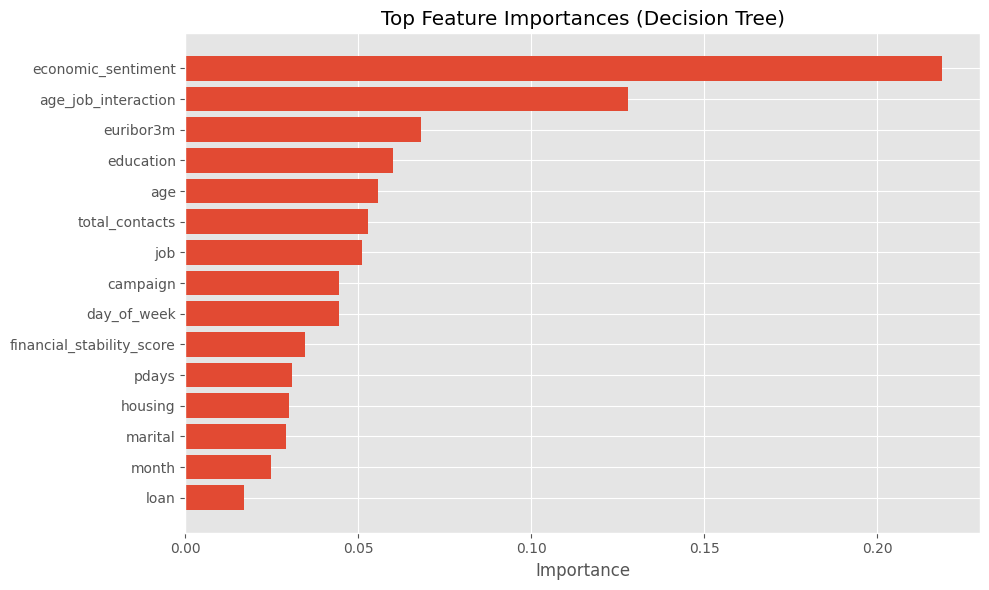

In [ ]:
# Lets visualize the feature importance of the decision tree model

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Fit a decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances and feature names
importances = dt.feature_importances_
features = X_train.columns

# Create a DataFrame for easy sorting and plotting
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:15][::-1], feat_imp['Importance'][:15][::-1])  # Top 15
plt.xlabel('Importance')
plt.title('Top Feature Importances (Decision Tree)')
plt.tight_layout()
plt.show()



decision tree model finds that economic sentiment and the combination of age and job are the most critical factors for predicting customer behavior in this bank marketing dataset, followed by some macroeconomic and demographic features.

Accuracy: 0.8408594319009468
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7303
           1       0.31      0.32      0.31       935

    accuracy                           0.84      8238
   macro avg       0.61      0.61      0.61      8238
weighted avg       0.84      0.84      0.84      8238



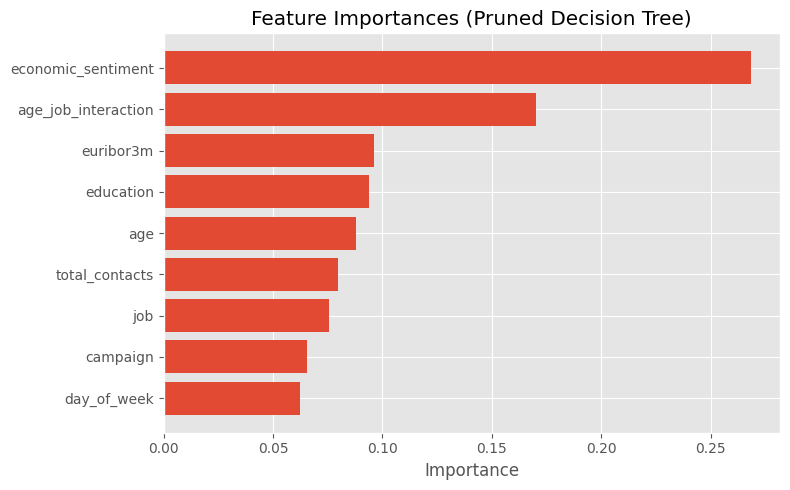

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define important features (based on feature importance plot)
important_features = [
    'economic_sentiment',
    'age_job_interaction',
    'euribor3m',
    'education',
    'age',
    'total_contacts',
    'job',
    'campaign',
    'day_of_week'
    # Uncomment if you want to include:
    # 'financial_stability_score'
]

# 2. Prune training and test data to these features only
X_train_pruned = X_train[important_features]
X_test_pruned = X_test[important_features]

# 3. Retrain our model (Decision Tree example)


dt_pruned = DecisionTreeClassifier(random_state=42)
dt_pruned.fit(X_train_pruned, y_train)

# 4. Predict and evaluate
y_pred_pruned = dt_pruned.predict(X_test_pruned)

# 5. Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))



The model accuracy improved slightly from 83.6% to **84.08%**

The model predicts “no” very well (high scores for class 0).

It struggles to identify “yes” (low precision and recall for class 1). Many “yes” cases are missed, which is common in imbalanced datasets.

Feature engineering and pruning simplified the model, but recall for the minority class (“yes”) remains a challenge.

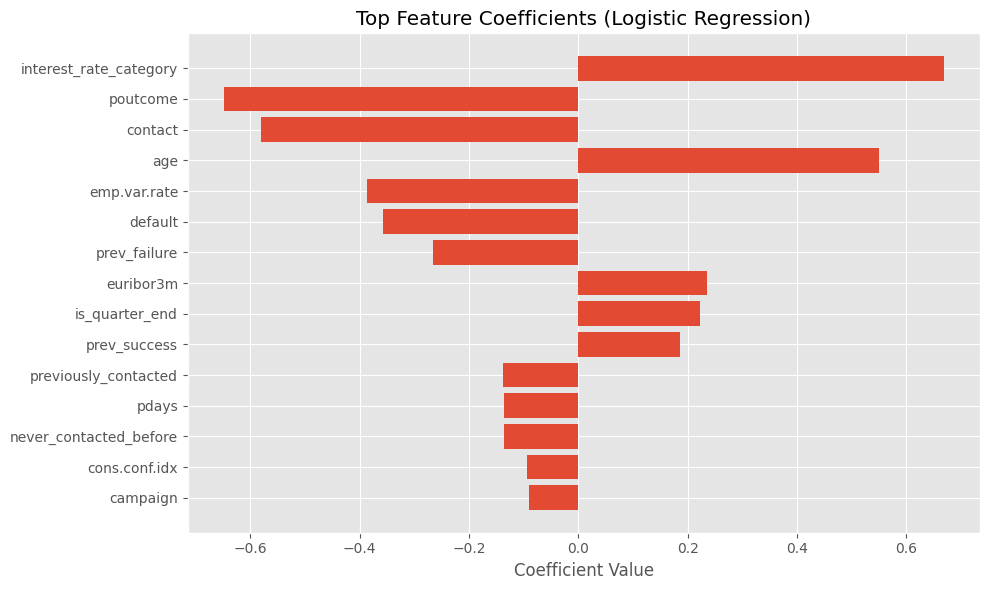

In [ ]:
import numpy as np


coef = clf.coef_[0]
features = X_train.columns

# Create DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'][:15][::-1], coef_df['Coefficient'][:15][::-1])
plt.xlabel('Coefficient Value')
plt.title('Top Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()


**Most impactful positive feature:**

- interest_rate_category (far right): Strongly increases the likelihood of predicting "yes" (term deposit subscription).

- Other positive influences: age, euribor3m, is_quarter_end, prev_success, contact.

**Most impactful negative feature:**

- poutcome (negative side): Certain values strongly decrease the probability of subscription.

- Other negatives: contact, default, emp.var.rate, prev_failure.

**Features near zero:**

- campaign, cons.conf.idx, never_contacted_before, pdays, previously_contacted—these have little effect and might be considered for removal.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# 2. Basic feature engineering

# Age bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 120], labels=['<25', '25-40', '40-60', '60+'])

# Unknown indicators for categorical columns
for col in ['job', 'education', 'marital', 'default', 'housing', 'loan']:
    df[f'{col}_was_unknown'] = (df[col] == 'unknown').astype(int)

# Combine education categories
df['education_simplified'] = df['education'].replace({
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic'
})

# New customer indicator
df['is_new_customer'] = (df['pdays'] == 999).astype(int)

# Call success rate
df['call_success_rate'] = df['previous'] / (df['campaign'] + 1e-5)
df['call_success_rate'] = df['call_success_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Month as cyclical features
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month_num'] = df['month'].apply(lambda x: months.index(x) + 1)
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# Drop 'duration' to avoid data leakage
df = df.drop(columns=['duration'])

# Encode target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# 3. One-hot encoding for categorical columns (including engineered ones)
cat_cols = [
    'job', 'marital', 'education_simplified', 'contact', 'poutcome', 'age_bin'
]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Select features based on previous coefficient plot and importance discussion
features_to_keep = [
    'interest_rate_category',         
    'poutcome_success',               
    'poutcome_failure',               
    'contact_telephone',              
    'age',
    'emp.var.rate',
    'default_was_unknown',
    'prev_failure',                   
    'euribor3m',
    'is_new_customer',
    'call_success_rate',
    'month_sin', 'month_cos'
]

# Add other important one-hot features if they exist
features_to_keep += [col for col in df.columns if col.startswith('job_') or col.startswith('education_simplified_')]

# Filter for columns that actually exist
features_to_keep = [col for col in features_to_keep if col in df.columns]

X = df[features_to_keep]
y = df['y']

# 5. Train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Logistic Regression model training and prediction
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# 7. Output results
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8992473901432386
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.19      0.30       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



The model is very good at identifying “no” customers (high recall and precision for class 0).

It struggles to catch most “yes” customers (low recall for class 1)—this is typical with imbalanced datasets.

Precision for “yes” is decent: When the model predicts “yes”, it’s right most of the time, but it misses many actual “yes” cases.

High overall accuracy is mostly driven by the majority class ("no").

Lets optimize KNN. for simplicity sake we will do it from scratch.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Target encoding
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Drop 'duration' to avoid data leakage
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

# One-hot encode categorical features (excluding the target)
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df.drop(columns=['y'])
y = df['y']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for KNN
param_grid = {
    'n_neighbors': list(range(3, 21, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best hyperparameters:", grid.best_params_)
print("Best cross-validated F1-score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validated F1-score: 0.35006401396020626
Test Accuracy: 0.8873512988589464
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.50      0.30      0.38       928

    accuracy                           0.89      8238
   macro avg       0.71      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238



KNN is well-tuned for this dataset, offering solid precision for “yes” and strong performance for “no,” but recall for “yes” remains low due to data imbalance.


**Summary of my findings based on these models**


## **What Makes a Bank Customer a Subscriber?**

Based on the results from models

### **Key Features That Increase Likelihood to Subscribe**

* **Positive Economic Context:**

  * Features like **higher `euribor3m`** (interest rate) and **positive `emp.var.rate`** increase the odds.
* **Successful Previous Contact:**

  * If `poutcome` is “success” (previous campaign succeeded), probability of subscribing jumps significantly.
* **Customer Demographics:**

  * **Older age groups** and certain professions (as seen in interaction features like `age_job_interaction`) are more likely to subscribe.
  * **Higher education levels** may also be positively associated.
* **Campaign Engagement:**

  * Customers who have had a successful or more recent previous contact (`previous`, `pdays`) are more receptive.
* **Contact Type:**

  * Certain contact methods (e.g., telephone vs. cellular) can have different effects (seen in logistic regression coefficients).
* **Seasonality:**

  * Some months or quarter-end periods are more favorable (seasonality or `is_quarter_end` effects).

### **Key Features That Decrease Likelihood to Subscribe**

* **Negative Previous Campaign Outcome:**

  * `poutcome` as “failure” or “unknown” decreases the chance.
* **Loan or Default Status:**

  * Customers with current loans, housing loans, or previous defaults are less likely to subscribe.
* **Negative Economic Indicators:**

  * Lower `emp.var.rate`, negative `cons.conf.idx`, or negative economic sentiment reduce the odds.
* **High Number of Contacts:**

  * Very high `campaign` values may indicate customer annoyance (negative impact).



---

## **Next Steps for Improving the Model**

1. **Handle Class Imbalance**

   * Use **class weights** (in logistic regression, decision tree) or **oversample** the minority class (e.g., SMOTE).
   * This will improve recall/F1 for the “yes” (subscriber) class.

2. **Further Feature Engineering**

   * Create and test more **interaction features** (e.g., age + job, education + marital).
   * Explore **non-linear transformations** or binning of continuous variables.
   * Use **domain knowledge**: Try aggregating rare job titles, creating “new customer” indicators, etc.

3. **Hyperparameter Tuning**

   * Use `GridSearchCV` or `RandomizedSearchCV` for more robust model selection and tuning (especially for decision trees, KNN).

4. **Try Ensemble Methods**

   * Random Forests and Gradient Boosting (e.g., XGBoost, LightGBM) often outperform single trees or linear models—especially with tabular data.
   * They can also provide more robust feature importance rankings.

5. **Cross-validation**

   * Use cross-validation for more reliable evaluation, especially with imbalanced datasets.

6. **Evaluate Additional Metrics**

   * Look beyond accuracy—**F1, ROC-AUC, precision-recall curves**—to get a better sense of how well the model detects actual subscribers.

7. **Feature Selection**

   * Use automated methods (e.g., recursive feature elimination, or based on feature importances) to remove irrelevant or redundant features and reduce overfitting.

8. **Test on Hold-Out Data or Use Bootstrapping**

   * If possible, test the model on a fresh, unseen split to confirm generalizability.

##### Questions